In [475]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [476]:
train=pd.read_csv('train.csv')

In [477]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [478]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

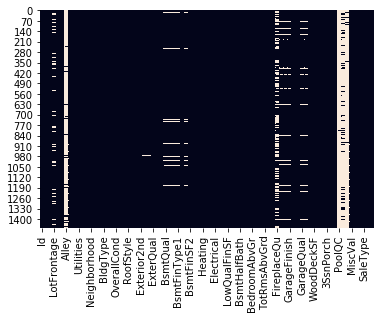

In [479]:
sns.heatmap(train.isnull(), cbar=False)

In [480]:
train.shape

(1460, 81)

In [481]:
#train.isnull().sum()

In [482]:
#fill missing values.... we will drop the columns with too much issing values
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage']).mean()

In [483]:
train.drop(['Alley'],axis=1,inplace=True)

In [484]:
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual']).mode()[0]
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond']).mode()[0]
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure']).mode()[0]
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2']).mode()[0]
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1']).mode()[0]

In [485]:
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu']).mode()[0]

In [486]:
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish']).mode()[0]
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual']).mode()[0]
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt']).mean()
train['GarageType']=train['GarageType'].fillna(train['GarageType']).mode()[0]
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond']).mode()[0]

In [487]:
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType']).mode()[0]
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea']).mean()

In [488]:
train.drop(['PoolQC'],axis=1,inplace=True)

In [489]:
train.drop(['MiscFeature'],axis=1,inplace=True)

In [490]:
train['Fence']=train['Fence'].fillna(train['Fence']).mode()[0]

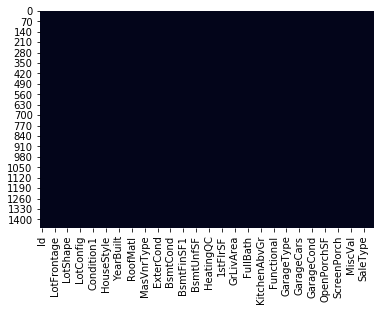

In [491]:
sns.heatmap(train.isnull(),cbar=False)

In [492]:
train.loc[:, train.isnull().any()].head()

,Electrical
0,SBrkr
1,SBrkr
2,SBrkr
3,SBrkr
4,SBrkr


In [493]:
train['Electrical']=train['Electrical'].fillna(train['Electrical']).mode()[0]

In [494]:
train.loc[:, train.isnull().any()].head()

""
0
1
2
3
4


In [495]:
train.shape

(1460, 78)

In [496]:
train.drop(['Id'],axis=1,inplace=True)

In [497]:
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])

In [498]:
columns=list(cat_data.columns)

In [499]:
def categorical_feature_columns(columns):
    df_final=final_df
    i=0
    for fields in columns:
        print(fields)
        df=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if(i==0):
            df_final=df.copy()
        else:
            df_final=pd.concat([df_final,df],axis=1)
        i=i+1
        
    df_final=pd.concat([final_df,df_final],axis=1)
    
    return df_final

In [500]:
main_df=train.copy()

In [501]:
df=pd.read_csv('modified_test_data.csv')

In [502]:
df.shape

(1459, 75)

In [503]:
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [504]:
final_df=pd.concat([train,df],axis=0)

In [505]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [506]:
final_df.shape

(2919, 78)

In [507]:
final_df=categorical_feature_columns(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [508]:
final_df.shape

(2919, 236)

In [509]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [510]:
final_df.shape

(2919, 177)

In [511]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,70.049958,8450,7,5,2003,2003,103.685262,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,70.049958,9600,6,8,1976,1976,103.685262,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,70.049958,11250,7,5,2001,2002,103.685262,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,70.049958,9550,7,5,1915,1970,103.685262,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,70.049958,14260,8,5,2000,2000,103.685262,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [512]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,70.049958,8450,7,5,2003,2003,103.685262,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,70.049958,9600,6,8,1976,1976,103.685262,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,70.049958,11250,7,5,2001,2002,103.685262,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,70.049958,9550,7,5,1915,1970,103.685262,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,70.049958,14260,8,5,2000,2000,103.685262,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.000000,1936,4,7,1970,1970,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,160,21.000000,1894,4,5,1970,1970,0.000000,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,20,160.000000,20000,5,7,1960,1996,0.000000,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,85,62.000000,10441,5,5,1992,1992,0.000000,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [513]:
df_train=final_df.iloc[:1422,:]
df_test=final_df.iloc[1422:,:]

In [514]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,70.049958,8450,7,5,2003,2003,103.685262,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,70.049958,9600,6,8,1976,1976,103.685262,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,70.049958,11250,7,5,2001,2002,103.685262,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,70.049958,9550,7,5,1915,1970,103.685262,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,70.049958,14260,8,5,2000,2000,103.685262,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [515]:
df_train.shape

(1422, 177)

In [516]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1422,120,70.049958,4435,6,5,2003,2003,103.685262,686.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1423,80,70.049958,19690,6,7,1966,1966,103.685262,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
1424,20,70.049958,9503,5,5,1958,1983,103.685262,457.0,374.0,...,0,0,0,0,1,0,0,0,1,0
1425,20,70.049958,10721,6,6,1959,1959,103.685262,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1426,60,70.049958,10944,7,5,1994,1994,103.685262,1000.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [517]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Sayak Ghanta\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [518]:
y_train=df_train['SalePrice']


In [519]:
x_train=df_train.drop(['SalePrice'],axis=1)

In [520]:
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,70.049958,8450,7,5,2003,2003,103.685262,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,70.049958,9600,6,8,1976,1976,103.685262,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,70.049958,11250,7,5,2001,2002,103.685262,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,70.049958,9550,7,5,1915,1970,103.685262,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,70.049958,14260,8,5,2000,2000,103.685262,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,60,70.049958,16545,8,5,1998,1998,103.685262,781.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1418,20,70.049958,9204,5,5,1963,1963,103.685262,25.0,872.0,...,0,0,0,0,0,0,0,0,1,0
1419,20,70.049958,16381,6,5,1969,1969,103.685262,1110.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1420,60,70.049958,11700,6,6,1968,1968,103.685262,404.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [521]:
import xgboost as xgb
classifier=xgb.XGBRegressor()
classifier.fit(x_train,y_train)

[18:41:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [522]:
import pickle
filename='result.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [523]:
y_pred=classifier.predict(df_test)

In [524]:
y_pred

array([138130.2  , 179628.27 , 135446.58 , ..., 172532.47 , 125287.414,
       242726.81 ], dtype=float32)

In [525]:
#submission file creat
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
dataset=pd.concat([sub_df['Id'],pred],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission.csv',index=False)